In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [112]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [113]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [114]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [115]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [116]:
print(df.shape)

(1000, 17)


In [117]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [118]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [119]:
MonthWiseSaleOfEachBranch = df.groupby(['Month','Branch'])['Total'].sum().reset_index()

print(MonthWiseSaleOfEachBranch)

   Month Branch       Total
0      1      A  38681.1285
1      1      B  37176.0585
2      1      C  40434.6810
3      2      A  29860.1205
4      2      B  34424.2710
5      2      C  32934.9825
6      3      A  37659.1215
7      3      B  34597.3425
8      3      C  37199.0430


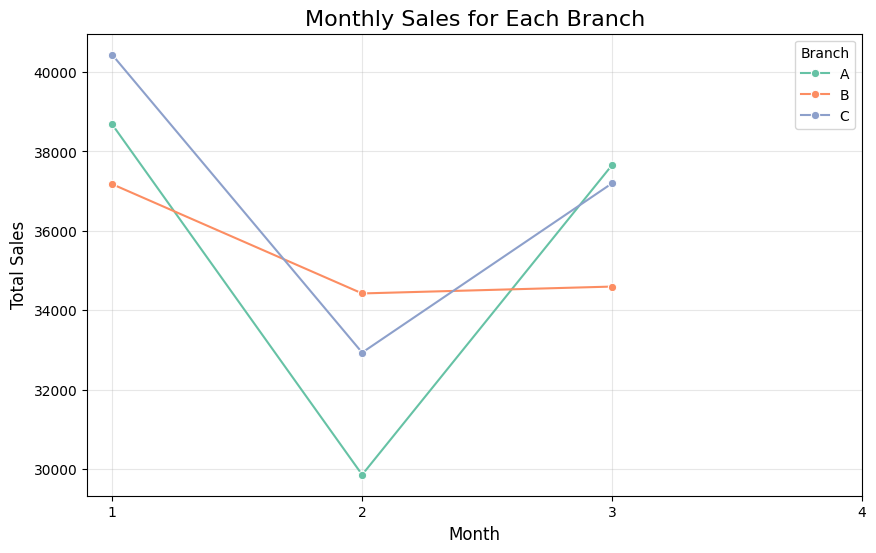

In [120]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=MonthWiseSaleOfEachBranch, x='Month', y='Total', hue='Branch', marker='o', palette='Set2')

plt.title('Monthly Sales for Each Branch', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 5))
plt.grid(alpha=0.3)
plt.show()

In [139]:
spending_by_gender = df.groupby('Gender')['Total'].sum()

print(spending_by_gender)

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


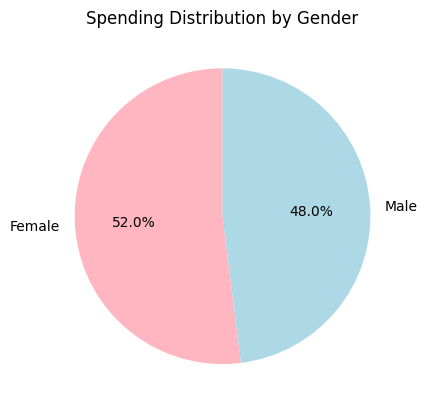

In [140]:
spending_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue'])
plt.title('Spending Distribution by Gender')
plt.ylabel('')
plt.show()

In [123]:
deptSpending = df.groupby('Product line')['Total'].sum()

print(deptSpending)

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


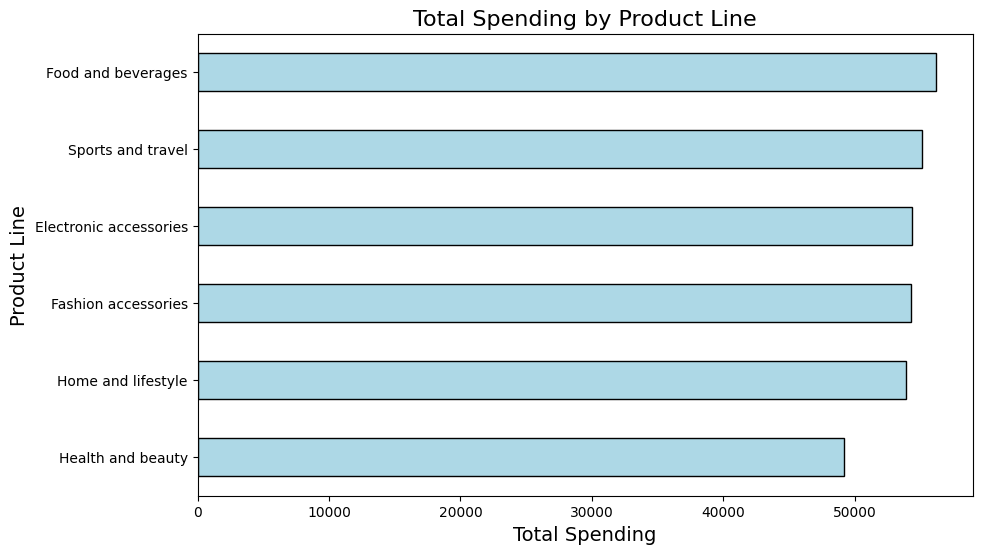

In [124]:
deptSpending.sort_values().plot(kind='barh', color='lightblue', edgecolor='black', figsize=(10, 6))

plt.title('Total Spending by Product Line', fontsize=16)
plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Product Line', fontsize=14)

plt.show()


In [125]:
genderWisePreferenceInProduct = df.groupby(['Gender', 'Product line']).size()

print(genderWisePreferenceInProduct)

Gender  Product line          
Female  Electronic accessories    84
        Fashion accessories       96
        Food and beverages        90
        Health and beauty         64
        Home and lifestyle        79
        Sports and travel         88
Male    Electronic accessories    86
        Fashion accessories       82
        Food and beverages        84
        Health and beauty         88
        Home and lifestyle        81
        Sports and travel         78
dtype: int64


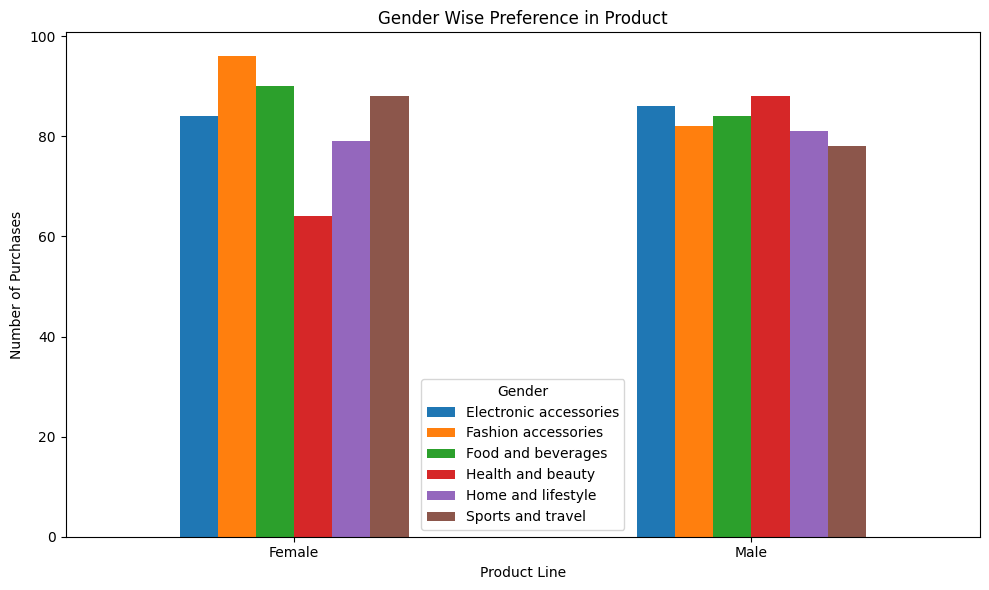

In [126]:
genderWisePreferenceInProduct.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Gender Wise Preference in Product')
plt.xlabel('Product Line')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [127]:
branchesInEachCity = df.groupby(['City', 'Branch'])['Branch'].count()

print(branchesInEachCity)

City       Branch
Mandalay   B         332
Naypyitaw  C         328
Yangon     A         340
Name: Branch, dtype: int64


In [128]:
branchSpending = df.groupby('Branch')['Total'].sum()

print(branchSpending)

totalSpending = branchSpending.sum()

print(totalSpending)

branchSpendingPercentage = branchSpending / totalSpending * 100

print(branchSpendingPercentage)

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64
322966.749
Branch
A    32.882757
B    32.881921
C    34.235322
Name: Total, dtype: float64


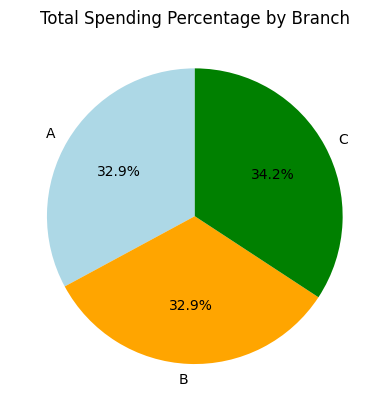

In [129]:
branchSpendingPercentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange','green'])
plt.title('Total Spending Percentage by Branch')
plt.ylabel('')
plt.show()

In [130]:
paymentTypes = df['Payment'].value_counts()

print(paymentTypes)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [131]:
paymentTypesInEachBranch = df.groupby(['Branch', 'Payment']).size()
print(paymentTypesInEachBranch)


Branch  Payment    
A       Cash           110
        Credit card    104
        Ewallet        126
B       Cash           110
        Credit card    109
        Ewallet        113
C       Cash           124
        Credit card     98
        Ewallet        106
dtype: int64


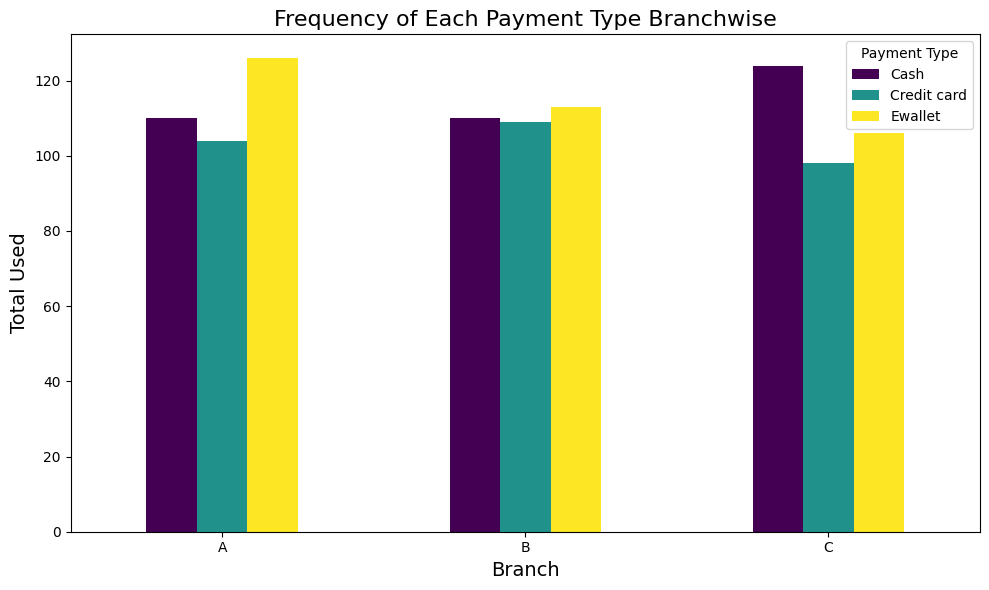

In [132]:
paymentTypesInEachBranch.unstack().plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Frequency of Each Payment Type Branchwise', fontsize=16)
plt.xlabel('Branch', fontsize=14)
plt.ylabel('Total Used', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Payment Type')
plt.tight_layout()
plt.show()

In [133]:
membersFrequency = df['Customer type'].value_counts()

print(membersFrequency)

Customer type
Member    501
Normal    499
Name: count, dtype: int64


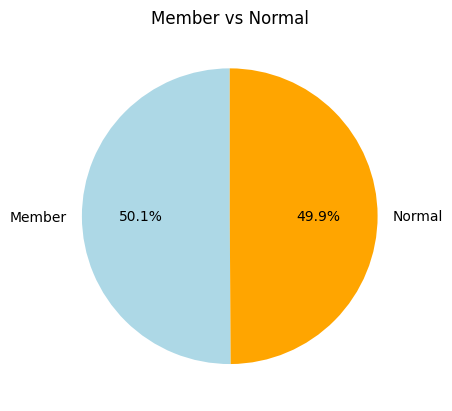

In [134]:
membersFrequency.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Member vs Normal')
plt.ylabel('')
plt.show()

In [135]:
ratingOfEachBranch = df.groupby('Branch')['Rating'].mean()

print(ratingOfEachBranch)

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64


The dataset conatined information about the sales made by a supermarket chain with branches in three different cities. The dataset spans over the starting three months of 2019.

1- By month-wise visualization, we found that each branch had a drop in sales in the month of February.
2- The total revenue was generated by 52% female customers and 48% males customers.
3- Each branch in the different cities was labelled A,B,C. A for Yangon, B for Mandalay and C for Naypyitaw.
4- The highest sales were made in the branch C with 34.4% and B and C having same percentage of sale i.e 32.9%.
5- Out of all the products, products related to Food and Beverages had the most money spend on by customers.
6- Female customers preferred Fashion accessories the most while male customers preferred Health and beauty products.
7- Out of Ewallet, cash and credit payment options, majority of the payments were done through Ewallet.
8- In branch A and B majority payments were done through ewallet and in branch C majority payments were done through cash.
9- 50.1% of customers were members of the supermarket and the remaining 49.9% were normal.
10- Branch A had an average rating of 7.02, Branch B 6.81 and Branch C 7.07.